In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('sp500_stocks.csv')


In [12]:
df_NVDA = df[df['Symbol'] == "NVDA"]
df_NVDA = df_NVDA[df['Date'] >= '2020-01-01']
df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date'])

C:\Users\ibrah\AppData\Local\Temp\ipykernel_52832\3784670921.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NVDA = df_NVDA[df['Date'] >= '2020-01-01']


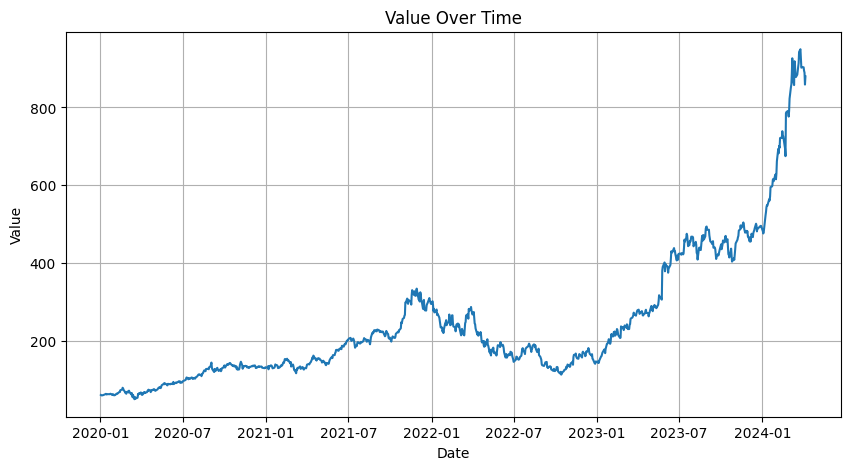

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the DataFrame
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'])  # Plot a line chart
plt.title('Value Over Time')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Value')  # Label the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot


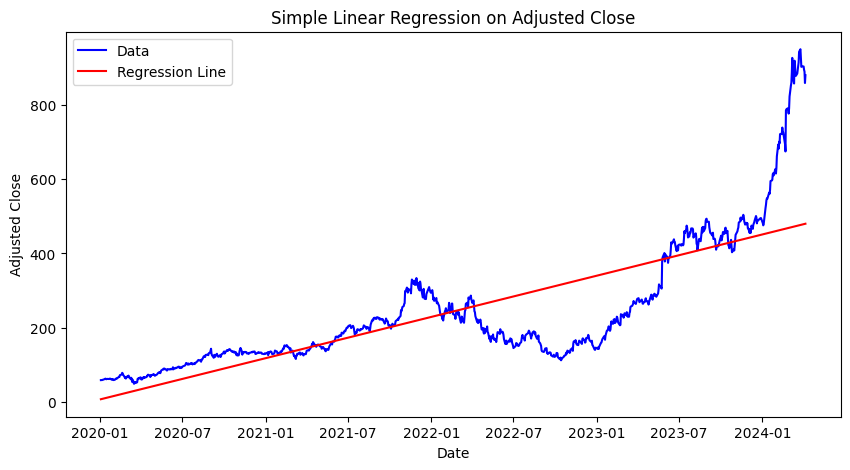

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Prepare data for regression
X = df_NVDA['Date'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df_NVDA['Adj Close'].values.reshape(-1, 1)

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predicting
df_NVDA['Predicted'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'], df_NVDA['Predicted'], color='red', label='Regression Line')  # Regression line
plt.title('Simple Linear Regression on Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()


In [15]:
df_NVDA['Prev Day Adj Close'] = df_NVDA['Adj Close'].shift(1)
df_NVDA = df_NVDA.iloc[1:]  # Excludes the first row
print(df_NVDA)

              Date Symbol   Adj Close       Close        High         Low  \
1254729 2020-01-03   NVDA   58.886452   59.017502   59.457500   58.525002   
1254730 2020-01-06   NVDA   59.133400   59.264999   59.317501   57.817501   
1254731 2020-01-07   NVDA   59.849308   59.982498   60.442501   59.097500   
1254732 2020-01-08   NVDA   59.961559   60.095001   60.509998   59.537498   
1254733 2020-01-09   NVDA   60.620094   60.755001   61.482498   60.215000   
...            ...    ...         ...         ...         ...         ...   
1255795 2024-04-01   NVDA  903.630005  903.630005  922.250000  892.039978   
1255796 2024-04-02   NVDA  894.520020  894.520020  900.940002  876.200012   
1255797 2024-04-03   NVDA  889.640015  889.640015  903.739990  884.000000   
1255798 2024-04-04   NVDA  859.049988  859.049988  906.340027  858.799988   
1255799 2024-04-05   NVDA  880.080017  880.080017  884.809998  859.260010   

               Open      Volume   Predicted  Prev Day Adj Close  
1254729  

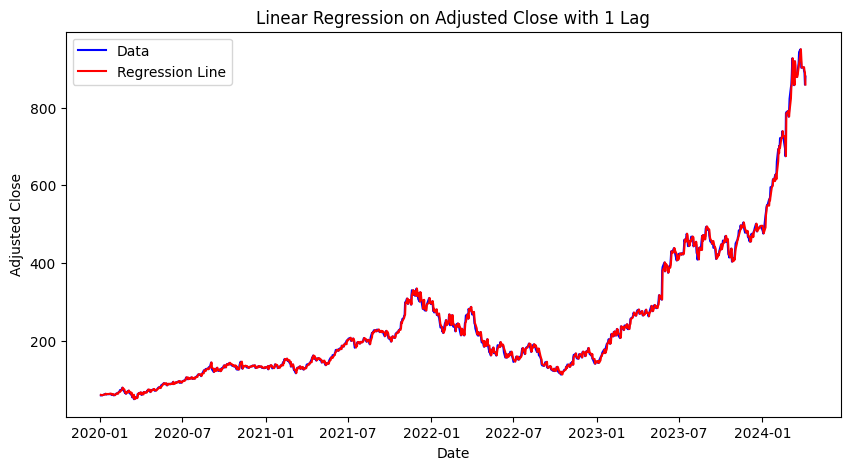

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for regression
X = df_NVDA['Prev Day Adj Close'].values.reshape(-1, 1)
y = df_NVDA['Adj Close'].values.reshape(-1, 1)

train_size = int(len(X) * 0.8)

# Split the data into training and testing sets using slicing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting
df_NVDA['Predicted'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'], df_NVDA['Adj Close'], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'], df_NVDA['Predicted'], color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Adjusted Close with 1 Lag')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()




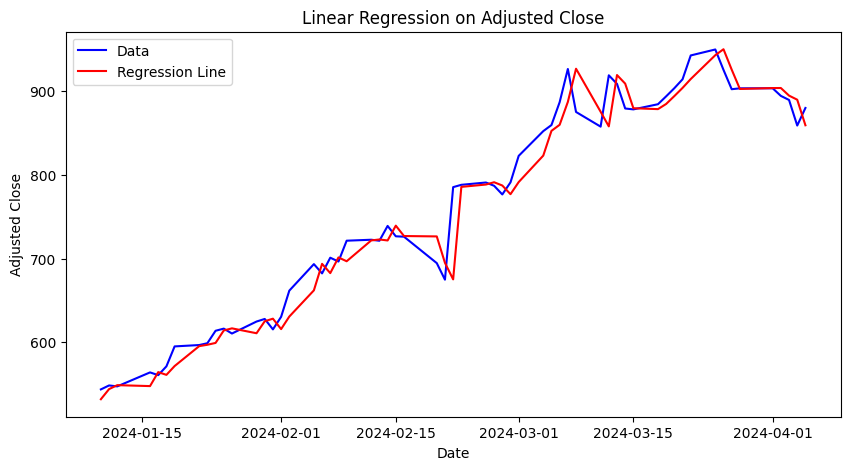

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df_NVDA['Date'][-60:], df_NVDA['Adj Close'][-60:], color='blue', label='Data')  # Scatter plot of the data
plt.plot(df_NVDA['Date'][-60:], df_NVDA['Predicted'][-60:], color='red', label='Regression Line')  # Regression line
plt.title('Linear Regression on Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.legend()
plt.show()

               mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
1255586  401.276571  0.903239     399.503733     403.049409    388.184871   
1255587  378.692790  1.176936     376.382752     381.002829    365.517589   
1255588  399.019302  1.306070     396.455806     401.582799    385.797306   
1255589  393.196464  1.004192     391.225481     395.167448    380.076463   
1255590  392.505696  0.824248     390.887898     394.123493    379.434088   
...             ...       ...            ...            ...           ...   
1255795  905.496221  2.688710     900.218941     910.773500    891.492673   
1255796  904.666008  2.492210     899.774409     909.557606    890.803201   
1255797  895.660110  2.516477     890.720881     900.599338    881.780425   
1255798  891.086142  2.521504     886.137045     896.035239    877.202943   
1255799  860.519889  2.689609     855.240844     865.798934    846.515676   

         obs_ci_upper  
1255586    414.368272  
1255587    391.867992  
125

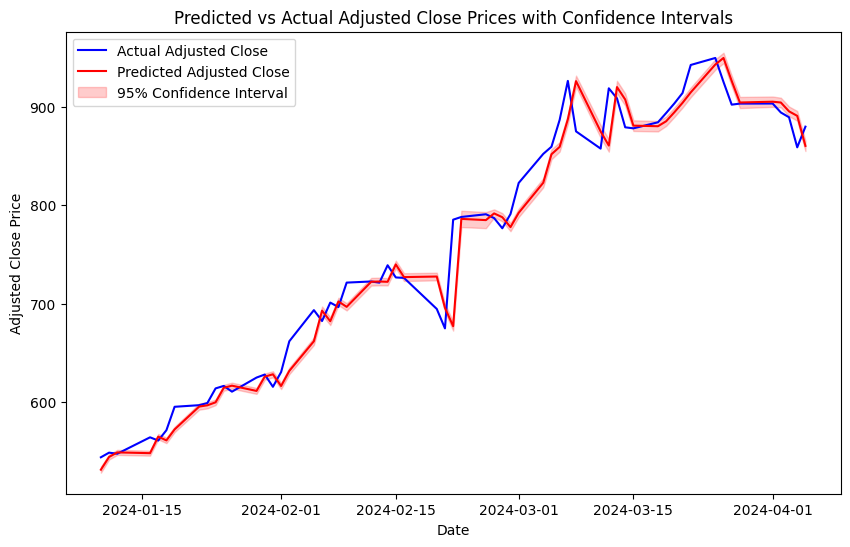

Mean Squared Error: 240.7812856973415


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "NVDA"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date

# Step 2: Generate lag features
for i in range(1, 4):  # Creating 3 lags as an example
    data[f'lag_{i}'] = data['Adj Close'].shift(i)

# Remove any rows with NaN values that were created by shifting
data = data.dropna()

# Step 3: Define features and target variable
X = data[[f'lag_{i}' for i in range(1, 4)]]  # Features are the lagged values
y = data['Adj Close']  # Target is the current adjusted close

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Fit model using statsmodels for detailed statistics
model = sm.OLS(y_train, X_train)
results = model.fit()

# Predict and calculate confidence intervals
predictions = results.get_prediction(X_test)
pred_summary = predictions.summary_frame(alpha=0.05)  # Get the summary dataframe with predictions and intervals
print(pred_summary)
# Step 6: Plotting results
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].iloc[len(y_train):][-60:], y_test[-60:], label='Actual Adjusted Close', color='blue')
plt.plot(data['Date'].iloc[len(y_train):][-60:], pred_summary['mean'][-60:], label='Predicted Adjusted Close', color='red')
plt.fill_between(data['Date'].iloc[len(y_train):][-60:], pred_summary['mean_ci_lower'][-60:], pred_summary['mean_ci_upper'][-60:], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Predicted vs Actual Adjusted Close Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Calculate and print MSE
mse = mean_squared_error(y_test, pred_summary['mean'])
print(f'Mean Squared Error: {mse}')


[207.8626967241597, 209.38663216549367, 209.00637365993833, 209.3588240056954, 210.69420868029482, 210.80600782253183, 212.06100793767254, 212.55384685150642, 216.1749440113197, 219.45443097165796, 220.61523062487686, 231.94081926657884, 234.03192468046575, 240.72051951991415, 242.8021092554822, 247.50123216268895, 249.95839808320838, 255.14212228416037, 257.4493192970627, 261.7630855101979, 266.42609765149564, 277.1838579899892, 284.5192719071556, 292.61565926274767, 296.7712648756814, 300.9591111509257, 274.1621800047935, 270.23693921960347, 284.74560339795147, 288.36964802615654]


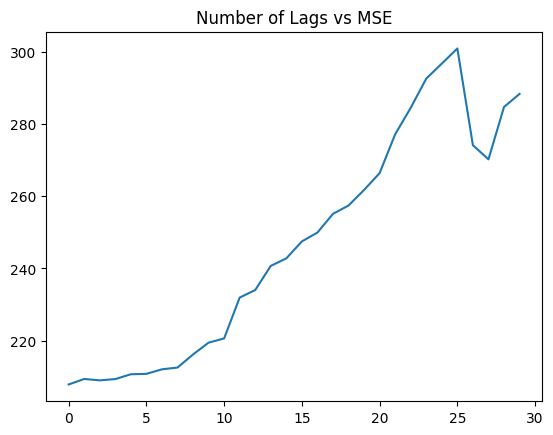

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "NVDA"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date
lag_error = []
for lag_amount in range(30):
    # Step 2: Generate lag features
    for i in range(1, lag_amount+2):  # Creating 3 lags as an example
        data[f'lag_{i}'] = data['Adj Close'].shift(i)

    # Remove any rows with NaN values that were created by shifting
    data = data.dropna()

    # Step 3: Define features and target variable
    X = data[[f'lag_{i}' for i in range(1, lag_amount+2)]]  # Features are the lagged values
    y = data['Adj Close']  # Target is the current adjusted close

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)

    # Step 5: Build a regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6: Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    # print(f'Mean Squared Error: {mse}')
    lag_error.append(mse)
print(lag_error)
plt.title('Number of Lags vs MSE')
plt.plot(range(30), lag_error)

1
2
3
4
5
6
7


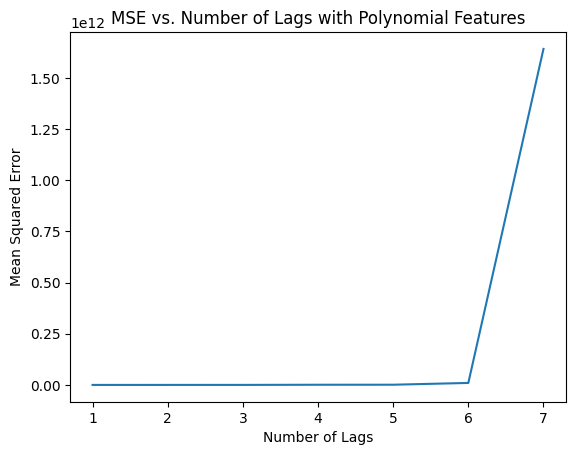

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Load the data
df = pd.read_csv('sp500_stocks.csv')
data = df[df['Symbol'] == "NVDA"]
data = data[data['Date'] >= '2020-01-01']
data['Date'] = pd.to_datetime(data['Date'])  # Convert the date column to datetime
data = data.sort_values(by='Date')  # Sort data by date
lag_error = []

for lag_amount in range(1, 8):  # Adjusted to start from 1 and go up to 10
    # Step 2: Generate lag features
    for i in range(1, lag_amount+1):  # Creating lag features up to lag_amount
        data[f'lag_{i}'] = data['Adj Close'].shift(i)

    # Remove any rows with NaN values that were created by shifting
    current_data = data.dropna()

    # Step 3: Define features and target variable
    X = current_data[[f'lag_{i}' for i in range(1, lag_amount+1)]]  # Features are the lagged values
    y = current_data['Adj Close']  # Target is the current adjusted close

    # Step 4: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Step 5: Transform features into polynomial features
    poly = PolynomialFeatures(degree=5)  # Create polynomial features of degree 2
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Build a regression model with polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Step 6: Evaluate the model
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    lag_error.append(mse)
    print(lag_amount)

# Plotting the error results
plt.plot(range(1, 8), lag_error)
plt.xlabel('Number of Lags')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of Lags with Polynomial Features')
plt.show()
